In [34]:
# Import libraries necessary for this project

%matplotlib notebook
%pylab inline

import skvideo.io
import skimage.data
import skimage.filters
import skimage.io
import numpy as np
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from skimage import color
from matplotlib import cm
import skimage.morphology

from sklearn.cluster import DBSCAN
from sklearn import metrics

Populating the interactive namespace from numpy and matplotlib


In [2]:
videoarray = skvideo.io.vread('data/improved_videos/video1.avi')

In [3]:
videoarray.shape

(499, 240, 320, 3)

In [3]:
t_array=videoarray[:,:,:,0]
t_array.shape

(499, 240, 320)

In [60]:
f_array=t_array.reshape(499,24,10,32,10)[4:496,:,0,:,0]

In [52]:
f_array.shape

(494, 24, 32)

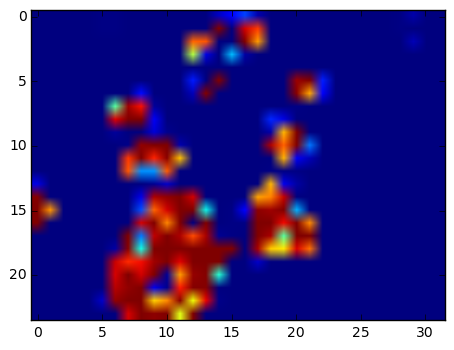

In [70]:
plt.imshow(f_array[10,:,:])

In [61]:
f_array[0,:,:]

array([[  0, 255, 255, 255, 255, 250,   0,   4, 251, 251,   0,   0,   0,
        255, 255, 255, 251, 250,   0, 251, 252, 252, 246, 255, 255, 255,
          2, 255,   0, 255,   0,   0],
       [  2,   0,   0,   0,   1,   0,   1,   1,   3,   0,   0,   0,   3,
          6, 255, 252,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,
          0,   1,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1,   1,   0,   0,   1, 255,   0, 255,
        255, 255, 252,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,
        252,   0,   0, 252,   0,   0],
       [  1,   0,   0,   0,   2,   1,   0,   0,   0,   0,   0,   0,   1,
        252, 252, 255,   4,   0,   0,   0,   0,   0,   0, 252,   1,   2,
        255,   3,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   2, 255,   0, 255,   1,   0,
          0, 253, 255,   0,   0,   0,   0,   0,   0,   0,   2,   0,   0,
          0, 251,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1,   0, 255, 255, 253,   0,
  

In [62]:
X = np.transpose(np.where(f_array > 100))

In [63]:
X

array([[  0,   0,   1],
       [  0,   0,   2],
       [  0,   0,   3],
       ..., 
       [491,  20,  10],
       [491,  20,  11],
       [491,  20,  12]])

In [64]:
X.shape

(14632, 3)

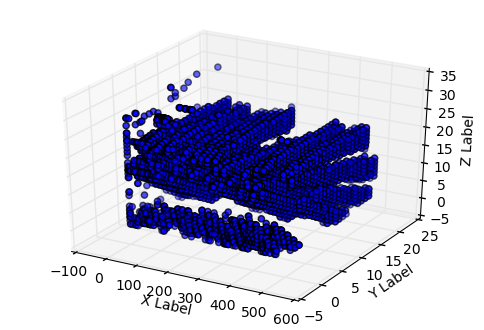

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=X[:,0], ys=X[:,1], zs=X[:,2], marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [66]:
db = DBSCAN(eps=2, min_samples=10).fit(X)

In [67]:
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 88


MemoryError: 

In [68]:
labels

array([-1, -1, -1, ..., 29, 29, 29])

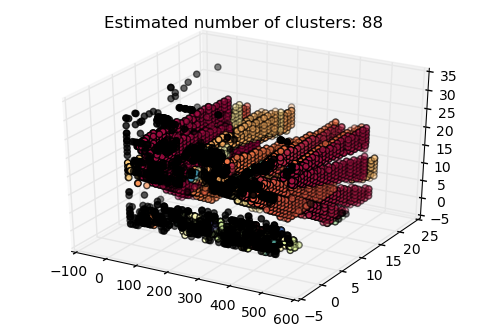

In [69]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    ax.scatter(xy[:, 0], xy[:, 1], xy[:, 2], 'o', c=col)

    xy = X[class_member_mask & ~core_samples_mask]
    ax.scatter(xy[:, 0], xy[:, 1], xy[:, 2], 'o', c=col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()